In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display as disp

### Lectura del CSV limpio


In [41]:
datos = pd.read_csv("../../datos/procesados/limpieza01_argentina_delitos.csv")
disp(datos)

,Id_hecho,provincia,localidad,anio,mes,tipo_lugar,tipo_lugar_ampliado,motivo_origen_registro,fecha_hecho,hora_hecho,tipo_persona_id,tipo_persona,sexo_victima,tr_edad_victima,clase_victima,sexo_inculpado,tr_edad_inculpado,relacion_inculpado_victima,relacion_victima_inculpado,cant_vic
0,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12929,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,1
1,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12930,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,1
2,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12931,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,1
3,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Víctima idRegistro 12235,Víctima,Masculino,45-49,Civil,No corresponde,No corresponde,No corresponde,Sin relación,1
4,11536,NEUQUEN,Cutral Có,2017,1,Vía pública,Vía pública,Intervención policial,7/1/2017,10:35:00,Imputado idRegistro 12932,Imputado,No corresponde,No corresponde,No corresponde,Masculino,30-34,Sin relación,No corresponde,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25155,28129,BUENOS AIRES,Florencio Varela,2021,11,Vía pública,Vía pública,Intervención policial,10/11/2021,11:11:11,Víctima idRegistro 29888,Víctima,Masculino,45-49,Civil,No corresponde,No corresponde,No corresponde,Otras relaciones no familiares,1
25156,28253,TIERRA DEL FUEGO,Ushuaia,2021,7,Domicilio particular,Domicilio particular,Intervención policial,4/7/2021,12:00:00,Imputado idRegistro 32993,Imputado,No corresponde,No corresponde,No corresponde,Femenino,25-29,Conyuge/ pareja,No corresponde,1
25157,28253,TIERRA DEL FUEGO,Ushuaia,2021,7,Domicilio particular,Domicilio particular,Intervención policial,4/7/2021,12:00:00,Víctima idRegistro 30020,Víctima,Masculino,25-29,Civil,No corresponde,No corresponde,No corresponde,Conyuge/ pareja,1
25158,28263,ENTRE RIOS,Concordia,2017,12,Vía pública,Vía pública,Intervención policial,25/12/2017,11:11:11,Imputado idRegistro 33004,Imputado,No corresponde,No corresponde,No corresponde,Masculino,30-34,Sin relación,No corresponde,1


### Graficando los datos en escala original 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

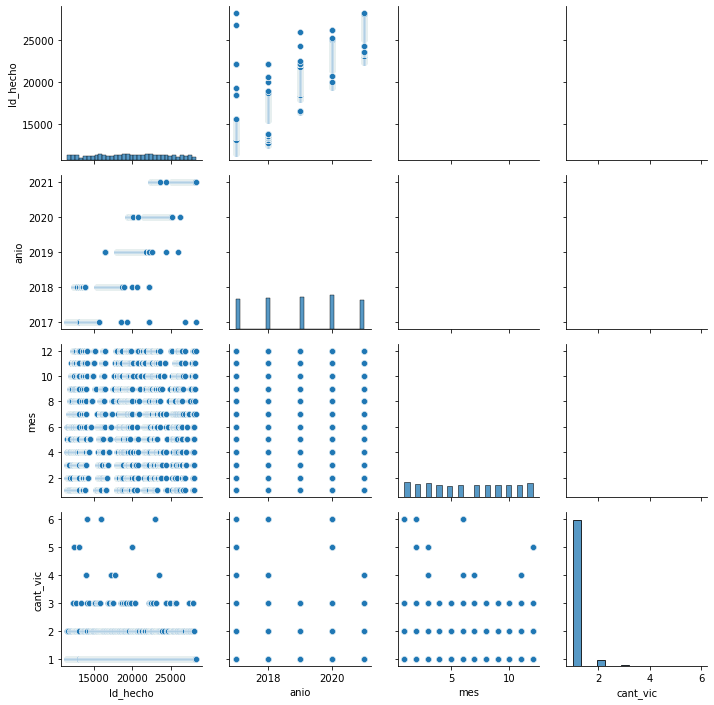

In [5]:
fig = plt.figure(figsize=(15, 5))
sns.pairplot(datos)
plt.show()

### Distribución de los datos originales

In [ ]:
for column in datos.columns:
    try:
        sns.histplot(datos[column])
        plt.show()
    except:
        continue

## Escalamiento

### Escala en función del mínimo y máximo

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
# Separar características numéricas y categóricas
numeric_features = datos.select_dtypes(include=['int', 'float']).columns

# Escalamiento de características numéricas
scaler = MinMaxScaler()
scaled_data = datos.copy()
scaled_data[numeric_features] = scaler.fit_transform(datos[numeric_features])

In [8]:
# convierte vectores de numpy a DataFrames para graficarlos
datos_escalados = pd.DataFrame(scaled_data, columns=datos.columns)

In [ ]:
datos_escalados

## Codificacion de datos categoricos

In [ ]:
#Observacion de los tipos de datos por columna, con el fin de encontrar aquellas con datos categoricos/object
print(datos.dtypes)

### Categoricos ordinales

In [ ]:
##No hay 

### Categoricos nominales

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Seleccionar las columnas de tipo object
object_columns = datos_escalados.select_dtypes(include=['object']).columns.copy()

# Iterar sobre las columnas seleccionadas y aplicar la codificación
for column in object_columns:
    encoder = LabelEncoder()
    datos_escalados[column] = encoder.fit_transform(datos_escalados[column].astype(str))

In [ ]:
datos

## Reduccion de dimencionalidad

In [11]:
from sklearn.feature_selection import SelectPercentile, chi2

In [12]:
def reduccion(data, lista_columnas, porcentaje):
    y = data[lista_columnas].copy()  # Variable objetivo numérica
    X = data.drop(columns=lista_columnas).copy()  # DataFrame con características numéricas excepto la variable objetivo
    
    # Aplicar la reducción de dimensionalidad
    selector = SelectPercentile(chi2, percentile=porcentaje)
    datos_reducidos = selector.fit_transform(X, y)
    
    # Obtener las columnas seleccionadas
    columnas_seleccionadas = X.columns[selector.get_support()]
    
    # Crear el DataFrame reducido con las columnas seleccionadas
    df_reducido = pd.DataFrame(datos_reducidos, columns=columnas_seleccionadas)
    
    # Agregar la columna 'sexo_victima' al DataFrame reducido
    df_reducido[lista_columnas] = y
    
    return df_reducido

In [ ]:
print(disp(datos_escalados))

Se reduce la dimensionalidad del dataframe en base a las columnas que se utilizaran para responder cada pregunta

- 1. ¿Cuál es la proporción de víctimas masculinas y femeninas en los delitos registrados?

In [13]:
datos_sexo_victima = reduccion(datos_escalados, 'sexo_victima', 5)

In [15]:
#Se recupera la codificacion categorica para la columna "sexo_victima"
datos_sexo_victima.sexo_victima = datos.sexo_victima
datos_sexo_victima['Id_hecho'] = datos.Id_hecho


In [18]:
print(disp(datos_sexo_victima))

,tipo_persona_id,sexo_victima,Id_hecho
0,0.0,No corresponde,11535
1,1.0,No corresponde,11535
2,2.0,No corresponde,11535
3,13646.0,Masculino,11535
4,3.0,No corresponde,11536
...,...,...,...
25155,25137.0,Masculino,28129
25156,13571.0,No corresponde,28253
25157,25141.0,Masculino,28253
25158,13573.0,No corresponde,28263


None


In [17]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion01_datos_sexo_victima.csv"  # Ruta y nombre del archivo de destino
datos_sexo_victima.to_csv(ruta_destino, index=False)

- 2. ¿Cuáles son los departamentos con mayor número de delitos?

In [19]:
datos_deptos_delitos = reduccion(datos_escalados, 'localidad', 5)

In [20]:
#Se recupera la codificacion categorica para la columna "localidad"
datos_deptos_delitos['localidad'] = datos.localidad
datos_deptos_delitos['Id_hecho'] = datos.Id_hecho

In [21]:
print(disp(datos_deptos_delitos))

,tipo_persona_id,localidad,Id_hecho
0,0.0,Plottier,11535
1,1.0,Plottier,11535
2,2.0,Plottier,11535
3,13646.0,Plottier,11535
4,3.0,Cutral Có,11536
...,...,...,...
25155,25137.0,Florencio Varela,28129
25156,13571.0,Ushuaia,28253
25157,25141.0,Ushuaia,28253
25158,13573.0,Concordia,28263


None


In [22]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion02_datos_deptos_delitos.csv"  # Ruta y nombre del archivo de destino
datos_deptos_delitos.to_csv(ruta_destino, index=False)

- 3. ¿Cuáles son los motivos más comunes que originaron el registro de un delito?

In [23]:
datos_motivos_delitos = reduccion(datos_escalados, 'motivo_origen_registro', 5)

In [24]:
#Se recupera la codificacion categorica para la columna "localidad"
datos_motivos_delitos['motivo_origen_registro'] = datos.motivo_origen_registro
datos_motivos_delitos['Id_hecho'] = datos.Id_hecho

In [25]:
print(disp(datos_motivos_delitos))

,tipo_persona_id,motivo_origen_registro,Id_hecho
0,0.0,Intervención policial,11535
1,1.0,Intervención policial,11535
2,2.0,Intervención policial,11535
3,13646.0,Intervención policial,11535
4,3.0,Intervención policial,11536
...,...,...,...
25155,25137.0,Intervención policial,28129
25156,13571.0,Intervención policial,28253
25157,25141.0,Intervención policial,28253
25158,13573.0,Intervención policial,28263


None


In [26]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion03_datos_motivo_delitos.csv"  # Ruta y nombre del archivo de destino
datos_motivos_delitos.to_csv(ruta_destino, index=False)

- 4. ¿Existe alguna relación entre el mes del año y la cantidad de delitos?

In [27]:
datos_fecha_delitos_anio = pd.DataFrame(datos.anio)
datos_fecha_delitos_mes = pd.DataFrame(datos.mes)
datos_fecha_delitos = pd.concat([datos_fecha_delitos_anio, datos_fecha_delitos_mes])
datos_fecha_delitos['Id_hecho'] = datos.Id_hecho

In [28]:
print(disp(datos_fecha_delitos))

,anio,mes,Id_hecho
0,2017.0,NaN,11535
1,2017.0,NaN,11535
2,2017.0,NaN,11535
3,2017.0,NaN,11535
4,2017.0,NaN,11536
...,...,...,...
25155,NaN,11.0,28129
25156,NaN,7.0,28253
25157,NaN,7.0,28253
25158,NaN,12.0,28263


None


In [29]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion03_datos_motivo_delitos.csv"  # Ruta y nombre del archivo de destino
datos_motivos_delitos.to_csv(ruta_destino, index=False)

- 5. ¿Hay alguna relación entre el lugar y el género de la victima?

In [30]:
datos_lugar_delitos = reduccion(datos_escalados, 'tipo_lugar', 5)
datos_lugar_delitos['tipo_lugar'] = datos.tipo_lugar

datos_genero_delitos = reduccion(datos_escalados, 'sexo_victima', 5)
datos_genero_delitos['sexo_victima'] = datos.sexo_victima


datos_lugar_genero_delito = pd.concat([datos_lugar_delitos, datos_genero_delitos])
datos_lugar_genero_delito['Id_hecho'] = datos.Id_hecho

In [31]:
print(disp(datos_lugar_genero_delito))

,tipo_persona_id,tipo_lugar,sexo_victima,Id_hecho
0,0.0,Domicilio particular,NaN,11535
1,1.0,Domicilio particular,NaN,11535
2,2.0,Domicilio particular,NaN,11535
3,13646.0,Domicilio particular,NaN,11535
4,3.0,Vía pública,NaN,11536
...,...,...,...,...
25155,25137.0,NaN,Masculino,28129
25156,13571.0,NaN,No corresponde,28253
25157,25141.0,NaN,Masculino,28253
25158,13573.0,NaN,No corresponde,28263


None


In [32]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion04_datos_lugar_genero_v_delito.csv"  # Ruta y nombre del archivo de destino
datos_lugar_genero_delito.to_csv(ruta_destino, index=False)

- 6. ¿Hay alguna relación entre el lugar y el género del inculpado?

In [33]:
datos_lugar_delitos = reduccion(datos_escalados, 'tipo_lugar', 5)
datos_lugar_delitos['tipo_lugar'] = datos.tipo_lugar

datos_genero_delitos = reduccion(datos_escalados, 'sexo_inculpado', 5)
datos_genero_delitos['sexo_inculpado'] = datos.sexo_inculpado

datos_genero_delitos['Id_hecho'] = datos.Id_hecho

datos_lugar_genero_delito = pd.concat([datos_lugar_delitos, datos_genero_delitos])

In [34]:
print(disp(datos_lugar_genero_delito))

,tipo_persona_id,tipo_lugar,sexo_inculpado,Id_hecho
0,0.0,Domicilio particular,NaN,NaN
1,1.0,Domicilio particular,NaN,NaN
2,2.0,Domicilio particular,NaN,NaN
3,13646.0,Domicilio particular,NaN,NaN
4,3.0,Vía pública,NaN,NaN
...,...,...,...,...
25155,25137.0,NaN,No corresponde,28129.0
25156,13571.0,NaN,Femenino,28253.0
25157,25141.0,NaN,No corresponde,28253.0
25158,13573.0,NaN,Masculino,28263.0


None


In [39]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion04_datos_lugar_genero_i_delito.csv"  # Ruta y nombre del archivo de destino
datos_lugar_genero_delito.to_csv(ruta_destino, index=False)

- 6. ¿Hay alguna relación entre el lugar y el género de la victima?

In [37]:
datos_lugar_delitos = reduccion(datos_escalados, 'tipo_lugar', 5)
datos_lugar_delitos['tipo_lugar'] = datos.tipo_lugar

datos_genero_delitos = reduccion(datos_escalados, 'sexo_victima', 5)
datos_genero_delitos['sexo_victima'] = datos.sexo_victima

datos_genero_delitos['Id_hecho'] = datos.Id_hecho

datos_lugar_genero_delito = pd.concat([datos_lugar_delitos, datos_genero_delitos])

In [38]:
print(disp(datos_lugar_genero_delito))

,tipo_persona_id,tipo_lugar,sexo_victima,Id_hecho
0,0.0,Domicilio particular,NaN,NaN
1,1.0,Domicilio particular,NaN,NaN
2,2.0,Domicilio particular,NaN,NaN
3,13646.0,Domicilio particular,NaN,NaN
4,3.0,Vía pública,NaN,NaN
...,...,...,...,...
25155,25137.0,NaN,Masculino,28129.0
25156,13571.0,NaN,No corresponde,28253.0
25157,25141.0,NaN,Masculino,28253.0
25158,13573.0,NaN,No corresponde,28263.0


None


In [40]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion04_datos_lugar_genero_v_delito.csv"  # Ruta y nombre del archivo de destino
datos_lugar_genero_delito.to_csv(ruta_destino, index=False)